## Tensores en Python

In [5]:
import numpy as np
x = np.arange(24).reshape(1,3,4,2)
x

array([[[[ 0,  1],
         [ 2,  3],
         [ 4,  5],
         [ 6,  7]],

        [[ 8,  9],
         [10, 11],
         [12, 13],
         [14, 15]],

        [[16, 17],
         [18, 19],
         [20, 21],
         [22, 23]]]])

In [8]:
# revisar los tamanos de las cosas:

print("length of x es ", len(x))  # el tamano del primer rango (lo llaman dimensio)
print("el rango de  x (lo llaman dimension), es ", np.ndim(x))
print("la forma del tensor 'shape' ", np.shape(x))
print("la dimension (desde el punto de vista de algebra lineal) es, ",np.size(x))



length of x es  1
el rango de  x (lo llaman dimension), es  4
la forma del tensor 'shape'  (1, 3, 4, 2)
la dimension (desde el punto de vista de algebra lineal) es,  24


In [16]:
y=x.flatten()
y
len(y)
# np.shape(y)

24

In [17]:
# Tensor de rango 4
x = np.arange(60)
x = x.reshape(5,2,2,3)
x

array([[[[ 0,  1,  2],
         [ 3,  4,  5]],

        [[ 6,  7,  8],
         [ 9, 10, 11]]],


       [[[12, 13, 14],
         [15, 16, 17]],

        [[18, 19, 20],
         [21, 22, 23]]],


       [[[24, 25, 26],
         [27, 28, 29]],

        [[30, 31, 32],
         [33, 34, 35]]],


       [[[36, 37, 38],
         [39, 40, 41]],

        [[42, 43, 44],
         [45, 46, 47]]],


       [[[48, 49, 50],
         [51, 52, 53]],

        [[54, 55, 56],
         [57, 58, 59]]]])

In [18]:
print("length of x es ", len(x))  # el tamano del primer rango (lo llaman dimensio)
print("el rango de  x (lo llaman dimension), es ", np.ndim(x))
print("la forma del tensor 'shape' ", np.shape(x))
print("la dimension (desde el punto de vista de algebra lineal) es, ",np.size(x))



length of x es  5
el rango de  x (lo llaman dimension), es  4
la forma del tensor 'shape'  (5, 2, 2, 3)
la dimension (desde el punto de vista de algebra lineal) es,  60


## Correlacion-cruzadas (cross-correlation) y convolucion (convolution).

### correlacion cruzada.
Aparece en la estadistica y mucho en DSP( Digital Signal Processing). 

Vamos a buscar una medida de "similitud".
Recordemos el producto punto.

$$\langle X, Y \rangle = X \cdot  Y = \sum_{i} x_i y_i = \| X \| \|Y \| \cos \theta  $$, asumimos que $X, Y \in \mathbb{R}^n$. 

Dos vectors $X, Y$ que tan cerca estan el uno del otro. En matematica definios la norma como una medida del tamano y la cercania como la norma entre la diferencia.

$$ \| X - Y \|  $$
Esto no siempre es una buena medida. En DL, DSP, en otras ramas nos interesa mas ver un patron que una escala absoluta. Una fotografia, incremente la intensidad en todos los pixeles de forma unifome, la fotografia se sigue identificando. 

Un ejemplo:

$$ X = \begin{pmatrix} 1 \\ -10  \\5 \end{pmatrix} \quad , \quad Y = \begin{pmatrix} 10 \\ -100 \\ 50  \end{pmatrix} $$

Si calculas $\| X - Y \|=\sqrt{9^2 + 90^2 + 45^2}=101.02 $


Como medimos esto. Una media es el coseno del angulo


$$ \cos \theta = \frac{X \cdot Y }{\|  X \| \| Y \|}$$


Vamos a usar el producto interno como una medida de similitud entre dos "senales" (vectores, tensores)

Donde esta la normalizacion? Normalente en DL, ML se normalizan los datos. Restandole la media y dividiendo por la norma. 

Para datos normalizados $\cos \theta = X \cdot Y$.
y que esta es una buena medida de similitud.

El producto interno se usa como medida de similitud.

Un ejemplo.

$f(t) = a_1 \cos( t + \phi) $,  $g(t) = a_2 \cos t$.
Sabemos que estas dos senales (funciones, vectores) son una un desplazamiento de la otra. Y si lo es queremos hallar ese deplazamiento $\phi$.

La forma es tomando productos internos (punto) y hacerle un corrimieinto)

Para el ejemplo grafico $\phi=pi$.





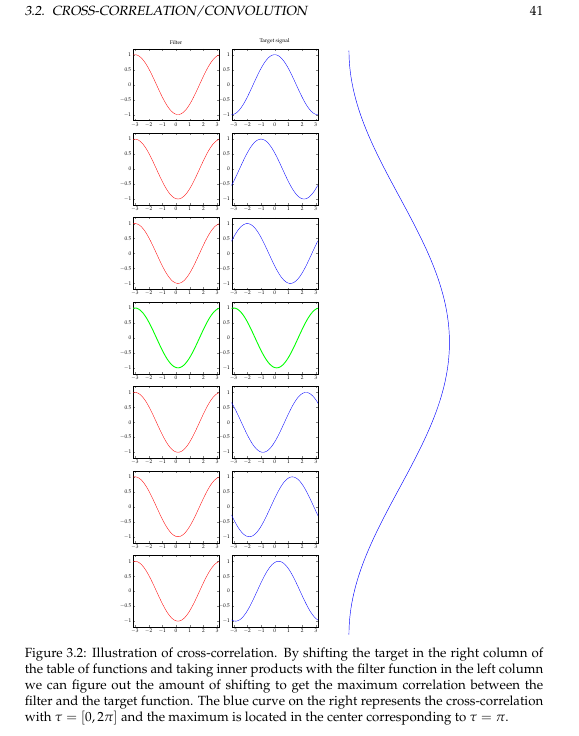

Lo que quermos es identificar un objeto dentro de un conjunto grande (eso es lo hace DL, imagenes con caption). Usamos el producto interno como una forma de enconterar similutud, y el desplazamiento como una forma de localizacion. 

Las condiciones son:
1. Se calculan productos internos como forma de buscar similitud
2. Se desilza el objeto en todas las direcciones.

En 1D solo tenemos una dereccion (izquiera a derecha).


Para la funcion $f(t) = a_1 \cos (t + \phi)$ estamos en el continuo.

$$\langle f(t), g ( t+ \tau ) \rangle = \int_D f(t) g(t + \tau ) d \tau $$

En el discreto

$$ (x * y) = \sum_i x_i y_{i+j} $$

Todo esto es la motivacion para introducir la definicion de **correlacion**


Resolvamos el ejemplo:
($\tau$ es el desplazamiento "shift", "lag")



Estadistica: comentario:
$$E[(X-\mu_x)(Y-\mu_y)]$$


El ejemplo que tenemos:

$$h(\tau) = f(t)*g(t) = \int_D f(t) g(t + \tau) dt = \int_D \cos(t + \phi)  \cos ( t + \tau)= \pi \cos(\tau - \phi)   $$

Esta integral es facil de calcular a mano 
usando la identidad

$$ \cos \alpha \cos \beta = \frac{\cos(\alpha + \beta)+ \cos(\alpha -\beta)}{2}$$


En el computador el mundo es discreto.
Entonces al final de cuentas:

$z_j = (x_i)* (y_i) = \sum_{i=0}^{N_x -1} x_i y_{i+j} $

Hablemos de los $x_i$ (datos) y los $y_i$ filtro.
Los $i$. Los $x_i$ son vectores donde $i=0,1, 2, \cdots, N_x-1$. Quiere decir $x=(x_i) \in \mathbb{R}^n$, donde $n=N_x$, de la misma forma $y$ es un vector con $N_y$ componentes.

Como el maximo de puntos que puede tener $Y$ es $N_y$,
entonces $j$ no puede tomar los valores que le de la
gana.

$z_j = (x_i)* (y_i) = \sum_{i=0, i+j < N_y}^{N_x -1} x_i y_{i+j} $
Si por alguna razon $i+j \ge N_y$ obteno un error de computacion llamado AOB (Array Out of Bounds).

Podemos escribir esto mejor.

$$z_j = x_i * y_i = \sum_{i=0}^{N_x - 1} x_i y_{i+j} \quad , \quad j=0,1, \cdots, N_y - N_x  $$

Verificacion de AOB (memoria fuera del arreglo)
El utlimo $i$ y el ultimo $j$.

$i=N_x-1, j=N_y- N_x, i+j = Nx-1 + N_y -N_x = N_y-1$

9:40 am

Stride (no se que es en espanol, es como un saldo).
En vez de calcular **TODAS** las muestras de salida $z_j$ se calculan en "brincos".

$$z_j = x_i * y_i = \sum_{i=0}^{N_x - 1} x_i y_{i+j} \quad , \quad j=0,s,2s, ks \le  \cdots, N_y - N_x  $$

Esto hace que se mas rapido y consuma menos memoria el sistema (pero pierde resolucion).


**Padding** , se agregan ceros $p$ a la izquierda y derecha del arreglo de entrada para que se puede deslizar mas el filtro y tener mas elementos de salida.

Se pueden contar los elementos de salida entre la correlacion (convolucion) de los $x$ con los $y$
para obtener los $z$.

$$ \#(z_j) = \frac{Ny - N_x + 2 p}{s} + 1 $$
donde $s$ es el stride (factor de escala).

Dos dimensiones (en funciones son dos variables, en discreto son matrices , o tensores de rango 2).

En el continuo:

$$h(\tau, \rho) = \int_{D_r} \int_{D_t} f(t,r) g(t+\tau, r + \rho) dt dr $$

El discreto:

$$ z_{jk} = (x * y)_{jk} = \sum_{m} \sum_{n} x_{mn} y_{m+j \; n+k}   $$

Los datos tienen dimensiones $(M_x, N_x)$, el filtro $(M_y, N_y)$. $m+j< M_y$, $n+k < N_y$.


Escribimos:
$$z_{jk} = (x * y)_{jk} = \sum_{m=0}^{M_x-1} \sum_{n=0}^{N_x-1} x_{mn} y_{m + j \; n+k}  \quad , \quad j=0,1,\cdots, , M_y - M_x \quad , \quad k=0,1, \cdots, N_y - N_x $$

El tamano del arreglo de salida

$$\#(z_{ij}) = (M_y - M_x + 1) \times (N_y - N_x + 1) $$

Padding. Padding agregar ceros (o otro numero) a los bordos con el fin de extender el arreglo de entrada para que la salida tengo mas elmentos. 

Si contamos el padding tenemos los siguientes elementos:

$$\#(z_{ij}) = (M_y - M_x + 2p_M +1) \times (N_y - N_x + 2 P_N + 1) $$

Se puede verifiar que si $P_m=M_x/2 -1$, $p_N=N_x/2-1$. el numero de "inputs" es igual al numero de "outputs" (a esto se llama en Keras/TensorFlow "same".
**padding=same**

Ejemplos: Nuericos.









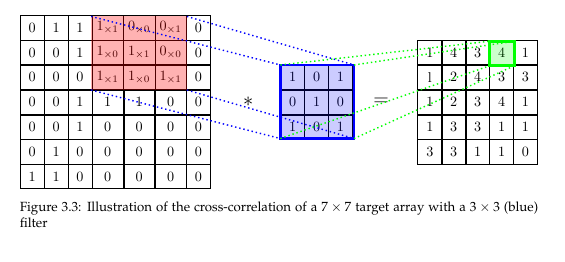

Ya explique que es el padding en tensores de rango 2 (2D). (matrices).

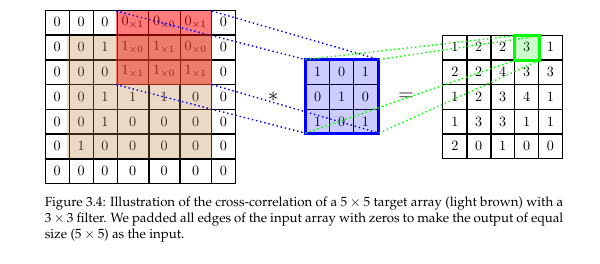

* Continuo: Funciones de 3 variables:

$$h(\tau, \rho , \zeta) = \int_{D_1} \int_{D_2} \int_{D_3} f(t,r,s) g(t + \tau, r + \rho, s + \zeta) \; dt dr ds$$


* Discreto: Tensores de rango 3 (en DL dimension 3).

\begin{eqnarray}
z_{jkl} = (x * y)_{jkl} = \sum_{m=0}^{M_x -1} \sum_{n=0}^{N_x-1} \sum_{o=0}^{O_x-1} x_{mno} y_{m+j \; n+k \; o+l}  \\
j=0,1, \cdots, M_y - M_x \\
k=0,1, \cdots, M_y - N_x \\
l = 0,1, \cdots, O_y - O_x
\end{eqnarray}

Tambien puede haber "stride" (s) en rango 2 y rango 3.

\begin{eqnarray}
z_{jkl} = (x * y)_{jkl} = \sum_{m=0}^{M_x -1} \sum_{n=0}^{N_x-1} \sum_{o=0}^{O_x-1} x_{mno} y_{m+j \; n+k \; o+l}  \\
j=0,s_x, 2 s_x \cdots,  M_y - M_x \\
k=0,s_y, 2 s_y \cdots, N_y - N_x \\
l = 0,s_z, 2 s_z \cdots, O_y - O_x
\end{eqnarray}

En la practica, generalmente $s_x=s_y=s_z$, $p_x=p_y=p_z$.

### Tensores de rango (orden) 4.
Donde aparecen: Video:

$$ frames (marcos) n_s \rightarrow n_x \rightarrow n_y  \rightarrow channel \quad n_c$$

Tarea: (ahora le mando la tarea) escribr la expresion continua y discreta para la correlacion cruzada (cross-correlation) que los DL llaman (convolucion) para tensores de rango 4 y generalizar
(usar puntos supensivos) a tensores de rango $n$.

Un tensor de orden (o rango) 3 se puede visualizar como un vector de matrices. Un ejemplo es una imagen
con tres canales (RGB: Red Green Blue). 
$n_c \times n_x \times n_y$

\begin{eqnarray}
\begin{pmatrix}
\begin{pmatrix}
2 & 3 & 0 \\
1 & 0 & 1 \\
0 & 2 & 0 
\end{pmatrix} 
\begin{pmatrix}
1 & 0  & 1 \\
0 & 1 & 0 \\
1 & 0 & 1 
\end{pmatrix}
\begin{pmatrix}
0 & 1 & 8 \\
1 & 5 & 0 \\
0 & 1 & 2
\end{pmatrix}
\end{pmatrix}
\end{eqnarray}













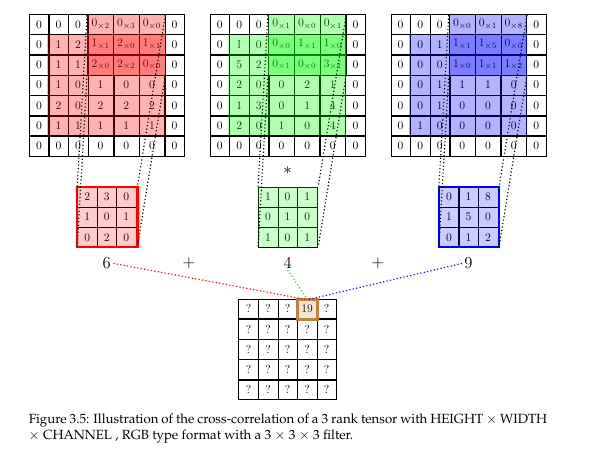

Formula para calcular el tamano de la salida de una correlacion cruzada en tensores de orden 2 (matrices).

$$\textrm{tamaño salida} = [(nx - kx + 2 px)/sx +1 ] \times [(ny-ky+ 2py)/sy + 1] $$